# Hypothesis Testing : One Sample t-test
## daily intake of 11 men taken from a population of diabetic men

In [3]:
import numpy as np
from scipy.stats import ttest_1samp,wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

In [7]:
# daily intake of Sugar in milligrams for 11 diabetic men

daily_intake = np.array([5560,5770,7640,5180,5690,6435,
                         6803,7689,6876,8213,8765])

- daily_intake is a single sample taken out of a population of daily_intake for men.
- The Question we are going to ask of the sample is, is it consistent with a mean of 7600
- Men corresponding to the 'Population' from which this sample was taken are expected to have a mean calorie intake of 7600
- **Null Hypothesis : population mean is equal to 7600**
- **Alternate Hypothesis : population mean is not equal to 7600 (unless specified otherwise)**

In [5]:
# one sample t-test
# null hypothesis: expected value = 7600
# alternate hypothesis: expected value != 7600

t_statistic, p_value = ttest_1samp(daily_intake,7600)
print('t-statistic = ',t_statistic,'\np-value = ',p_value)

t-statistic =  -2.2925841964555027 
p-value =  0.04481624562570511


## Conclusion from one sample t-test:
- level of confidence (alpha = 0.05)
- p-value < 0.05, so we reject the Null Hypothesis
- p_value < 0.05 => alternative hypothesis is true.
- data deviate significantly from the hypothesis that the mean is 7600 at the 5% level of significance
- So, we have 95% confidence to say that the alternate hypothesis is true (since p-value is 0.045, we are 95.5% confidence)
- There is enough evidence to say that the population from which these 11 men come from does not have a mean of 7600

In [6]:
print ("one-sample t-test p-value=", p_value)

one-sample t-test p-value= 0.04481624562570511


In [8]:
# one sample wilcoxon-test
# null hypothesis: expected value = 7600
# alternate hypothesis: expected value != 7600

z_statistic, p_value = wilcoxon(daily_intake - 7600)
print('z-statistic = ',z_statistic,'\np-value = ',p_value)

z-statistic =  12.5 
p-value =  0.06821657316330874


## Conclusion from one sample wolcoxon-test:
- p-value >= 0.05 => p-value >= alpha  => Do not Reject the Null Hypothesis
- wicoxin-test is the same test as t-test, but without the assumption of Normality
- Input to wilcoxin test is sample minus the expected mean 
- This test effectively tests if the median of the sample is equal to zero.It is a test of the median
- We use median with wilcoxon-test because, even if the distribution is not normal, median still represents the middle of the distribution and dataset

In [12]:
print("one-sample wilcoxon-test p-value", p_value)

one-sample wilcoxon-test p-value 0.06821657316330874


## one sample t-test and one sample wilcoxon-test are gving different results
- In practice, we run the more powerful test assuming normality, which is the t-test
- Then, we run the less powerful test assuming normality, which is the wilcoxon test
- Then we check both the solutions.If the solutions are the same, we do not have any issues,since both give same answer
- if both methods, reject or do not reject, there is no issue, but if one rejects and the other does not reject, then we see a problem and in most cases, 
- we consider the more powerful test ie, t-test

In [13]:
#t-statistic = (xbar - mu)/S
(np.mean(daily_intake) - 7600) / np.std(daily_intake)

-0.7249787788506311

In [14]:
#check power of t-test
print(ttest_power(-0.725, nobs=11, alpha=0.05, alternative='two-sided'))

0.5835176733152669


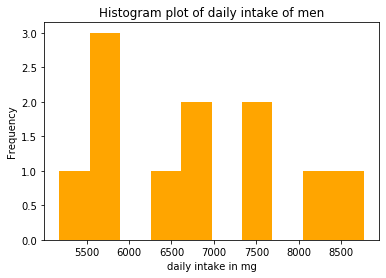

In [22]:
#Histogram plot
plt.hist(daily_intake, label=True, color ='orange', stacked=True)
plt.title('Histogram plot of daily intake of men')
plt.xlabel('daily intake in mg')
plt.ylabel('Frequency')
plt.show()

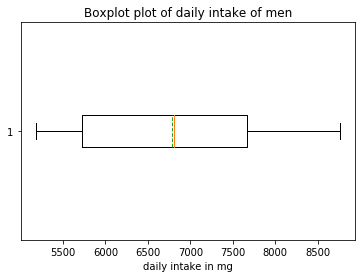

In [33]:
plt.boxplot(daily_intake, vert=False, showmeans=True, meanline=True,showbox=True, whis=True)
plt.title('Boxplot plot of daily intake of men')
plt.xlabel('daily intake in mg')
plt.show()

## Decision based on distribution and Hypothesis tests
- Both the Histogram and Boxplot show that the distribution is approximately normal.
- So, we make use of one sample t-test knowing that the distribution is normal.
- p-value < 0.05 (p-value < aplha), so we reject our claim that mean daily intake of men is equal to 7600 an make the conclusion that the mean daily intake of men is not equal to 7600